Write by:
Yitzhak Grinvald, I.D. 204551808
Yair Langerman, I.d. 204156434

In [15]:
import numpy as np
import pandas as pd
import keras
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [16]:
pip install matplotlib

In [19]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels),(test_data, test_labels) = reuters.load_data(
    num_words=10000)

In [20]:
len(test_data)

2246

In [21]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [22]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

In [23]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [24]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [25]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [26]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

### Building your model

**Model definition**

In [27]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [28]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [29]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [30]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Validating your approach

**Setting aside a validation set**

In [31]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [32]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 99ms/step - loss: 2.6948 - accuracy: 0.4722 - val_loss: 1.8473 - val_accuracy: 0.6070
Epoch 2/20
16/16 [==============================] - 1s 41ms/step - loss: 1.5642 - accuracy: 0.6690 - val_loss: 1.4096 - val_accuracy: 0.6890
Epoch 3/20
16/16 [==============================] - 1s 55ms/step - loss: 1.1994 - accuracy: 0.7422 - val_loss: 1.2181 - val_accuracy: 0.7300
Epoch 4/20
16/16 [==============================] - 1s 38ms/step - loss: 0.9783 - accuracy: 0.7897 - val_loss: 1.1194 - val_accuracy: 0.7550
Epoch 5/20
16/16 [==============================] - 1s 37ms/step - loss: 0.8065 - accuracy: 0.8252 - val_loss: 1.0482 - val_accuracy: 0.7790
Epoch 6/20
16/16 [==============================] - 1s 32ms/step - loss: 0.6694 - accuracy: 0.8578 - val_loss: 0.9612 - val_accuracy: 0.8030
Epoch 7/20
16/16 [==============================] - 1s 52ms/step - loss: 0.5528 - accuracy: 0.8872 - val_loss: 0.9320 - val_accuracy: 0.8040
Epoch 8/20
16

**Plotting the training and validation loss**

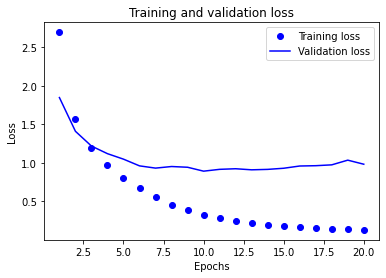

In [33]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [34]:
results = model.evaluate(partial_x_train,partial_y_train)

250/250 [==============================] - 1s 3ms/step - loss: 0.1068 - accuracy: 0.9667


**Plotting the training and validation accuracy**

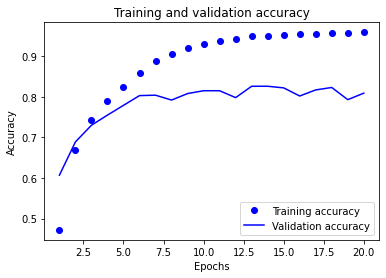

In [35]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

### A different way to handle the labels and the loss

In [36]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [37]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
# from tensorflow.keras.datasets import imdb
# (train_data, train_labels), _ = imdb.load_data(num_words=10000)

# train_data = vectorize_sequences(train_data)

Add regularizers to the model

In [38]:
from tensorflow.keras import regularizers

model = keras.Sequential([
  layers.Dense(64, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
  layers.Dense(64, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 50ms/step - loss: 3.1581 - accuracy: 0.4463 - val_loss: 2.2624 - val_accuracy: 0.5890
Epoch 2/20
16/16 [==============================] - 1s 36ms/step - loss: 1.9404 - accuracy: 0.6610 - val_loss: 1.7390 - val_accuracy: 0.6610
Epoch 3/20
16/16 [==============================] - 1s 35ms/step - loss: 1.5661 - accuracy: 0.7136 - val_loss: 1.5266 - val_accuracy: 0.7120
Epoch 4/20
16/16 [==============================] - 1s 36ms/step - loss: 1.3602 - accuracy: 0.7593 - val_loss: 1.4194 - val_accuracy: 0.7370
Epoch 5/20
16/16 [==============================] - 1s 34ms/step - loss: 1.2112 - accuracy: 0.7949 - val_loss: 1.3493 - val_accuracy: 0.7500
Epoch 6/20
16/16 [==============================] - 1s 35ms/step - loss: 1.1024 - accuracy: 0.8187 - val_loss: 1.2942 - val_accuracy: 0.7690
Epoch 7/20
16/16 [==============================] - 1s 33ms/step - loss: 1.0148 - accuracy: 0.8390 - val_loss: 1.2515 - val_accuracy: 0.7770
Epoch 8/20
16

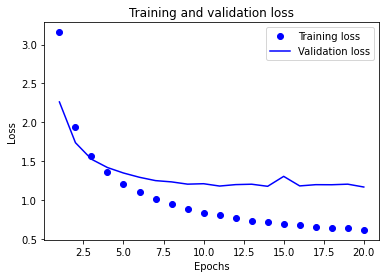

In [39]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [40]:
results = model.evaluate(partial_x_train,partial_y_train)

250/250 [==============================] - 1s 3ms/step - loss: 0.5838 - accuracy: 0.9514


Epoch 1/10
16/16 [==============================] - 2s 58ms/step - loss: 3.0704 - accuracy: 0.5277 - val_loss: 2.1581 - val_accuracy: 0.6530
Epoch 2/10
16/16 [==============================] - 1s 46ms/step - loss: 1.8845 - accuracy: 0.7095 - val_loss: 1.7935 - val_accuracy: 0.7240
Epoch 3/10
16/16 [==============================] - 1s 53ms/step - loss: 1.5377 - accuracy: 0.7746 - val_loss: 1.5871 - val_accuracy: 0.7420
Epoch 4/10
16/16 [==============================] - 1s 54ms/step - loss: 1.3171 - accuracy: 0.8106 - val_loss: 1.4443 - val_accuracy: 0.7910
Epoch 5/10
16/16 [==============================] - 1s 53ms/step - loss: 1.1540 - accuracy: 0.8418 - val_loss: 1.3955 - val_accuracy: 0.7940
Epoch 6/10
16/16 [==============================] - 1s 53ms/step - loss: 1.0416 - accuracy: 0.8646 - val_loss: 1.3238 - val_accuracy: 0.8000
Epoch 7/10
16/16 [==============================] - 1s 53ms/step - loss: 0.9703 - accuracy: 0.8789 - val_loss: 1.3001 - val_accuracy: 0.8160
Epoch 8/10
16

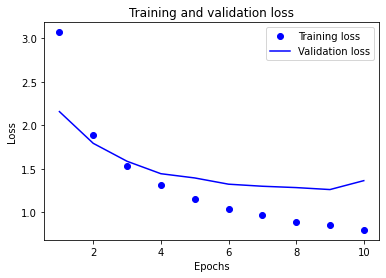

In [41]:
from tensorflow.keras import regularizers

model = keras.Sequential([
  layers.Dense(128, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
  layers.Dense(128, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [55]:
results = model.evaluate(partial_x_train,partial_y_train)

250/250 [==============================] - 3s 10ms/step - loss: 0.7566 - accuracy: 0.9260


Add Dropout

Epoch 1/25
16/16 [==============================] - 2s 91ms/step - loss: 2.7342 - accuracy: 0.4035 - val_loss: 1.7308 - val_accuracy: 0.6110
Epoch 2/25
16/16 [==============================] - 1s 46ms/step - loss: 1.7032 - accuracy: 0.6030 - val_loss: 1.3721 - val_accuracy: 0.6840
Epoch 3/25
16/16 [==============================] - 1s 67ms/step - loss: 1.4124 - accuracy: 0.6729 - val_loss: 1.2385 - val_accuracy: 0.7150
Epoch 4/25
16/16 [==============================] - 1s 52ms/step - loss: 1.2456 - accuracy: 0.7095 - val_loss: 1.1469 - val_accuracy: 0.7400
Epoch 5/25
16/16 [==============================] - 1s 58ms/step - loss: 1.1046 - accuracy: 0.7394 - val_loss: 1.0629 - val_accuracy: 0.7720
Epoch 6/25
16/16 [==============================] - 1s 49ms/step - loss: 0.9979 - accuracy: 0.7681 - val_loss: 1.0121 - val_accuracy: 0.7790
Epoch 7/25
16/16 [==============================] - 1s 50ms/step - loss: 0.9192 - accuracy: 0.7839 - val_loss: 0.9718 - val_accuracy: 0.7940
Epoch 8/25
16

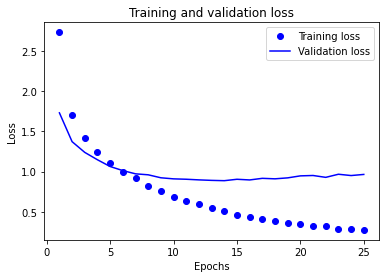

In [42]:
model = keras.Sequential([
  layers.Dense(128 , activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(128, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=25,
                    batch_size=512,
                    validation_data=(x_val, y_val))

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [43]:
results = model.evaluate(partial_x_train,partial_y_train)

250/250 [==============================] - 1s 3ms/step - loss: 0.1180 - accuracy: 0.9634


Epoch 1/22
16/16 [==============================] - 2s 91ms/step - loss: 2.3103 - accuracy: 0.4890 - val_loss: 1.4817 - val_accuracy: 0.6540
Epoch 2/22
16/16 [==============================] - 1s 72ms/step - loss: 1.4402 - accuracy: 0.6680 - val_loss: 1.2339 - val_accuracy: 0.7130
Epoch 3/22
16/16 [==============================] - 1s 78ms/step - loss: 1.1678 - accuracy: 0.7316 - val_loss: 1.0838 - val_accuracy: 0.7510
Epoch 4/22
16/16 [==============================] - 1s 81ms/step - loss: 0.9931 - accuracy: 0.7712 - val_loss: 1.0056 - val_accuracy: 0.7830
Epoch 5/22
16/16 [==============================] - 1s 81ms/step - loss: 0.8446 - accuracy: 0.8033 - val_loss: 0.9438 - val_accuracy: 0.8020
Epoch 6/22
16/16 [==============================] - 1s 86ms/step - loss: 0.7206 - accuracy: 0.8297 - val_loss: 0.9031 - val_accuracy: 0.8120
Epoch 7/22
16/16 [==============================] - 2s 101ms/step - loss: 0.6235 - accuracy: 0.8503 - val_loss: 0.8900 - val_accuracy: 0.8140
Epoch 8/22
1

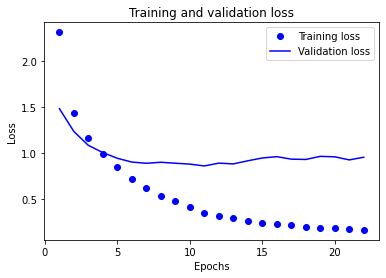

In [44]:
model = keras.Sequential([
  layers.Dense(256 , activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(256, activation="relu"),
  layers.Dropout(0.5),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=22,
                    batch_size=512,
                    validation_data=(x_val, y_val))

loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [45]:
results = model.evaluate(partial_x_train,partial_y_train)

250/250 [==============================] - 1s 5ms/step - loss: 0.0793 - accuracy: 0.9682


המודל האופטימאלי שמצאנו עם accuracy: 0.9684 

256 perceptrones per layer,
dropout (0.5),
epochs=22